# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
f = open('disease_data.json', 'r')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
#Your code here
type(data)

dict

In [3]:
data.keys()

dict_keys(['meta', 'data'])

In [4]:
type(data['data'])

list

In [5]:
len(data['data'])

60266

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [6]:
import pandas as pd

df_meta = pd.DataFrame.from_dict(data['meta'])
df_meta

,view
attribution,"Centers for Disease Control and Prevention, Na..."
attributionLink,http://www.cdc.gov/nccdphp/dph/
averageRating,0
category,Chronic Disease Indicators
columns,"[{'id': -1, 'name': 'sid', 'dataTypeName': 'me..."
createdAt,1463517008
description,CDC's Division of Population Health provides c...
displayType,table
downloadCount,80068
flags,"[default, restorable, restorePossibleForType]"


In [7]:
len(data['meta']['view']['columns'])

42

In [8]:
#Your code here
df_data = pd.DataFrame.from_dict(data['data'])
cols = []
for col_dict in data['meta']['view']['columns']:
    print(f"col_name: {col_dict['name']}")
    cols.append(col_dict['name'])
df_data.columns = cols
df_data.head()

col_name: sid
col_name: id
col_name: position
col_name: created_at
col_name: created_meta
col_name: updated_at
col_name: updated_meta
col_name: meta
col_name: YearStart
col_name: YearEnd
col_name: LocationAbbr
col_name: LocationDesc
col_name: DataSource
col_name: Topic
col_name: Question
col_name: Response
col_name: DataValueUnit
col_name: DataValueType
col_name: DataValue
col_name: DataValueAlt
col_name: DataValueFootnoteSymbol
col_name: DatavalueFootnote
col_name: LowConfidenceLimit
col_name: HighConfidenceLimit
col_name: StratificationCategory1
col_name: Stratification1
col_name: StratificationCategory2
col_name: Stratification2
col_name: StratificationCategory3
col_name: Stratification3
col_name: GeoLocation
col_name: ResponseID
col_name: LocationID
col_name: TopicID
col_name: QuestionID
col_name: DataValueTypeID
col_name: StratificationCategoryID1
col_name: StratificationID1
col_name: StratificationCategoryID2
col_name: StratificationID2
col_name: StratificationCategoryID3
col_nam

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


In [9]:
df_data[['LocationAbbr']]

,LocationAbbr
0,US
1,AL
2,AK
3,AZ
4,AR
...,...
60261,PR
60262,PR
60263,PR
60264,PR


In [10]:
df_data[['LocationDesc']]

,LocationDesc
0,United States
1,Alabama
2,Alaska
3,Arizona
4,Arkansas
...,...
60261,Puerto Rico
60262,Puerto Rico
60263,Puerto Rico
60264,Puerto Rico


In [11]:
df_data[['Topic']]

,Topic
0,Alcohol
1,Alcohol
2,Alcohol
3,Alcohol
4,Alcohol
...,...
60261,Disability
60262,Overarching Conditions
60263,Overarching Conditions
60264,Overarching Conditions


In [12]:
df_data[['Question']]

,Question
0,Binge drinking prevalence among adults aged >=...
1,Binge drinking prevalence among adults aged >=...
2,Binge drinking prevalence among adults aged >=...
3,Binge drinking prevalence among adults aged >=...
4,Binge drinking prevalence among adults aged >=...
...,...
60261,Disability among adults aged >= 65 years
60262,Poverty
60263,Poverty
60264,Poverty


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [13]:
athsma_related_df = df_data.query("Topic=='Asthma'")
#athsma_related_df[['Question']].head()
for _, row in athsma_related_df[['Question']].head().iterrows():
    print(row[0])

Current asthma prevalence among adults aged >= 18 years
Current asthma prevalence among adults aged >= 18 years
Current asthma prevalence among adults aged >= 18 years
Current asthma prevalence among adults aged >= 18 years
Current asthma prevalence among adults aged >= 18 years


In [14]:
target_asthma_rate_question_df = athsma_related_df.query("Question=='Current asthma prevalence among adults aged >= 18 years'")
target_asthma_rate_question_df[['Question', 'LocationAbbr', 'DataValue', 'DataValueUnit']]

,Question,LocationAbbr,DataValue,DataValueUnit
4725,Current asthma prevalence among adults aged >=...,IL,6.5,%
5529,Current asthma prevalence among adults aged >=...,IN,6.7,%
5632,Current asthma prevalence among adults aged >=...,IA,5.6,%
6777,Current asthma prevalence among adults aged >=...,KS,6.1,%
7034,Current asthma prevalence among adults aged >=...,KY,6.9,%
...,...,...,...,...
10225,Current asthma prevalence among adults aged >=...,WI,None,%
10226,Current asthma prevalence among adults aged >=...,WY,None,%
10227,Current asthma prevalence among adults aged >=...,GU,None,%
10228,Current asthma prevalence among adults aged >=...,PR,None,%


In [15]:
target_asthma_rate_question_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 4725 to 10229
Data columns (total 42 columns):
sid                          870 non-null int64
id                           870 non-null object
position                     870 non-null int64
created_at                   870 non-null int64
created_meta                 870 non-null object
updated_at                   870 non-null int64
updated_meta                 870 non-null object
meta                         0 non-null object
YearStart                    870 non-null object
YearEnd                      870 non-null object
LocationAbbr                 870 non-null object
LocationDesc                 870 non-null object
DataSource                   870 non-null object
Topic                        870 non-null object
Question                     870 non-null object
Response                     0 non-null object
DataValueUnit                870 non-null object
DataValueType                870 non-null object
DataValue       

In [16]:
target_asthma_rate_question_df = target_asthma_rate_question_df.dropna(axis=0, subset=['DataValue'])
target_asthma_rate_question_df.loc[:, 'DataValue'] = target_asthma_rate_question_df.DataValue.astype('float64')
target_asthma_rate_question_df[['Question', 'LocationAbbr', 'DataValue', 'DataValueUnit', 'YearStart', 'YearEnd']].sort_values(by='DataValue', ascending=False)

,Question,LocationAbbr,DataValue,DataValueUnit,YearStart,YearEnd
10139,Current asthma prevalence among adults aged >=...,ME,28.9,%,2016,2016
10133,Current asthma prevalence among adults aged >=...,IL,27.5,%,2016,2016
10194,Current asthma prevalence among adults aged >=...,ME,25.8,%,2016,2016
10209,Current asthma prevalence among adults aged >=...,ND,24.9,%,2016,2016
10155,Current asthma prevalence among adults aged >=...,ND,24.3,%,2016,2016
...,...,...,...,...,...,...
9937,Current asthma prevalence among adults aged >=...,NC,4.5,%,2016,2016
9985,Current asthma prevalence among adults aged >=...,NE,4.4,%,2016,2016
9931,Current asthma prevalence among adults aged >=...,NE,4.2,%,2016,2016
9576,Current asthma prevalence among adults aged >=...,GU,3.7,%,2016,2016


In [17]:
differing_cols = []
for col in target_asthma_rate_question_df:
    if target_asthma_rate_question_df.loc[9931][col] != target_asthma_rate_question_df.loc[9985][col]:
        differing_cols.append(col)
differing_cols
for differing_col in differing_cols:
    print(f"""
        target_asthma_rate_question_df.loc[9931]['{differing_col}']=={target_asthma_rate_question_df.loc[9931][differing_col]} 
        != target_asthma_rate_question_df.loc[9985]['{differing_col}']=={target_asthma_rate_question_df.loc[9985][differing_col]}
    """)


        target_asthma_rate_question_df.loc[9931]['sid']==9928 
        != target_asthma_rate_question_df.loc[9985]['sid']==9982
    

        target_asthma_rate_question_df.loc[9931]['id']==B290A44F-5318-4303-A71D-6CA0EE559324 
        != target_asthma_rate_question_df.loc[9985]['id']==F8D090DF-259F-4AF7-9AAD-52C33A6FD557
    

        target_asthma_rate_question_df.loc[9931]['position']==9928 
        != target_asthma_rate_question_df.loc[9985]['position']==9982
    

        target_asthma_rate_question_df.loc[9931]['DataValueType']==Crude Prevalence 
        != target_asthma_rate_question_df.loc[9985]['DataValueType']==Age-adjusted Prevalence
    

        target_asthma_rate_question_df.loc[9931]['DataValue']==4.2 
        != target_asthma_rate_question_df.loc[9985]['DataValue']==4.4
    

        target_asthma_rate_question_df.loc[9931]['DataValueAlt']==4.2 
        != target_asthma_rate_question_df.loc[9985]['DataValueAlt']==4.4
    

        target_asthma_rate_question_df.loc[993

In [18]:
target_asthma_rate_question_df = target_asthma_rate_question_df.query("DataValueTypeID=='AGEADJPREV' & StratificationCategoryID1=='OVERALL'")
final_df = target_asthma_rate_question_df.sort_values(by='DataValue', ascending=False)
final_df[['Question', 'DataValue', 'DataValueUnit', 'DataValueType', 'LocationAbbr']]

,Question,DataValue,DataValueUnit,DataValueType,LocationAbbr
9445,Current asthma prevalence among adults aged >=...,12.7,%,Age-adjusted Prevalence,ME
9455,Current asthma prevalence among adults aged >=...,12.0,%,Age-adjusted Prevalence,NH
9457,Current asthma prevalence among adults aged >=...,11.9,%,Age-adjusted Prevalence,NM
9474,Current asthma prevalence among adults aged >=...,11.8,%,Age-adjusted Prevalence,WV
9443,Current asthma prevalence among adults aged >=...,11.5,%,Age-adjusted Prevalence,KY
9448,Current asthma prevalence among adults aged >=...,11.1,%,Age-adjusted Prevalence,MI
9468,Current asthma prevalence among adults aged >=...,11.0,%,Age-adjusted Prevalence,TN
9437,Current asthma prevalence among adults aged >=...,10.7,%,Age-adjusted Prevalence,HI
9478,Current asthma prevalence among adults aged >=...,10.7,%,Age-adjusted Prevalence,PR
9464,Current asthma prevalence among adults aged >=...,10.7,%,Age-adjusted Prevalence,PA


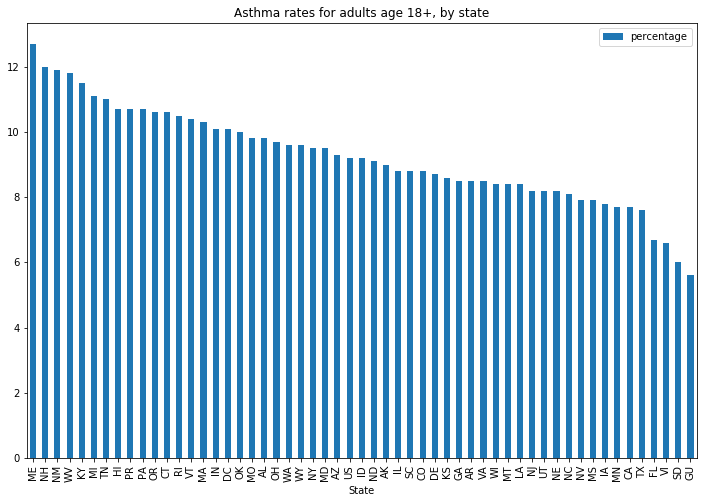

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = final_df.plot.bar(x='LocationAbbr', y='DataValue', figsize=(12,8));
ax.set_xlabel('State')
ax.legend(['percentage'])
ax.set_title("Asthma rates for adults age 18+, by state");

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!